# **Clustering Jerárquico**

Los llamados métodos jerárquicos tienen por objetivo agrupar clusters para formar uno nuevo o bien separar alguno ya existente para dar origen a otros dos, de tal forma que, si sucesivamente se va efectuando este proceso de aglomeración o división, se minimice alguna distancia o bien se maximice alguna medida de
similitud.

### **Enfoques**:

- Los **métodos aglomerativos**, también conocidos como ascendentes, comienzan el análisis con tantos grupos como individuos haya. A partir de estas unidades iniciales se van formando grupos, de forma ascendente, hasta que al final del proceso todos los casos tratados están englobados en un mismo conglomerado.

- Los **métodos disociativos**, también llamados descendentes, constituyen el proceso inverso al anterior. Comienzan con un conglomerado que engloba a todos los casos tratados y, a partir de este grupo inicial, a través de sucesivas divisiones, se van formando grupos cada vez más pequeños. Al final del proceso
se tienen tantas agrupaciones como casos han sido tratados.

**Ventajas:** No requiere definir el número de clústeres al inicio; puedes "cortar" el dendrograma a la altura que desees para obtener el número de grupos ideal.

**Desventajas:** Es computacionalmente muy costoso (lento para millones de datos) y, una vez que se ha realizado una unión o división, no se puede deshacer en pasos posteriores.

### **Metodo aglomerativo**

Primeramente cada dato es un cluster individual, luego el algoritmo busca los dos puntos que mas se parecen y los une, asi sucesivamente. Termina cuando todos los pequeños grupos se han unido en un gran bloque. Una ventaja adicional de este método es la posibilidad de obtener representaciones (basadas en árboles) de las observaciones, conocidas como dendogramas.

<p align="center">
  <img src="img/dendograma.png" width="600">
</p>

#### **Algoritmo**

Como primer paso es necesario establecer la medida de disimilitud a utilizar entre cada par de observaciones. Comúnmente se emplea la distancia euclídea, pero existen otras (distancia de Mahalanobis, distancia de Minkowski, etc.). Por otro lado, se encuentra la disimilitud entre pares de grupos de observaciones, donde aparece el concepto de método de unión o linkage, que mide esta disimilitud.

#### Criterios de enlace (linkage)

- Distancia Mínima: Se calculan por parejas las disimilitudes entre las observaciones en el clúster A y el B, escogiendo la mínima de estas medidas. Puede dar lugar a dendogramas donde las observaciones se fusionan una a una, obteniendo clústeres muy extendidos

$$
d_{\min}(D_i, D_j) = \min_{x \in D_i, y \in D_j} \|x - y\|
$$

- Distancia Máxima: Se calculan por parejas las disimilitudes entre las observaciones en el clúster A y el B, escogiendo la máxima de las distancias.

$$
d_{\max}(D_i, D_j) = \max_{x \in D_i, y \in D_j} \|x - y\|
$$

- Distancia Promedio: Se calculan por parejas las disimilitudes entre las observaciones en el clúster A y el B, escogiendo la media de las distancias.

$$
d_{\text{avg}}(D_i, D_j) = \frac{1}{n_i n_j} \sum_{x \in D_i} \sum_{y \in D_j} \|x - y\|
$$

- Distancia de Centroides: Medida de disimilitud entre el centroide del clúster A y el centroide del clúster B. Suele utilizarse con frecuencia en genómica, pero puede dar lugar a inversiones indeseables que dificulten la visualización e interpretación.

$$
d_{\text{mean}}(D_i, D_j) = \|\mu_i - \mu_j\|
$$

El algoritmo procede de manera iterativa. Inicialmente, cada observación es tratada como su propio clúster. Los dos clústeres más parecidos entre sí se unen, quedando n – 1 clústeres. A continuación, y partiendo de este cambio, los dos clústeres más parecidos entre sí se unen de nuevo, quedando n – 2 clústeres. Se continúa de esta forma hasta que todas las observaciones pertenezcan a un único clúster y se complete el dendograma.

### Implementacion con sklearn

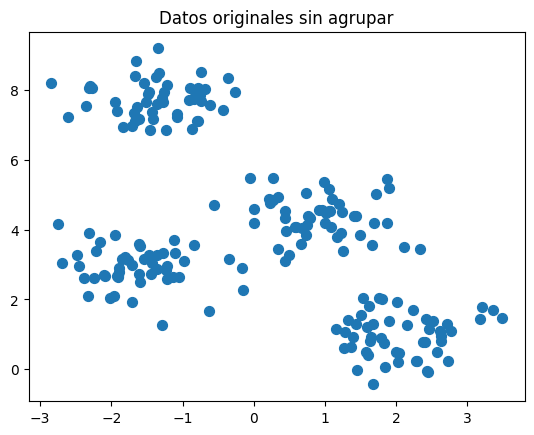

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=200, centers=4, cluster_std=0.6, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos originales sin agrupar")
plt.show()

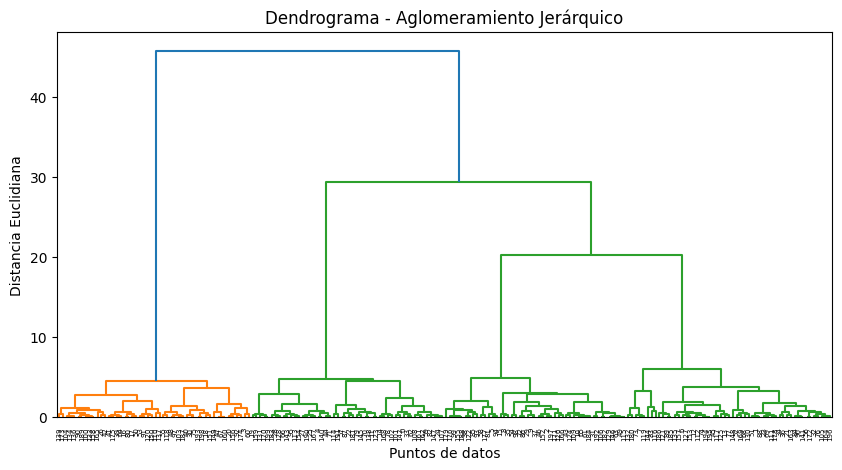

In [5]:
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrograma - Aglomeramiento Jerárquico")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia Euclidiana")
plt.show()

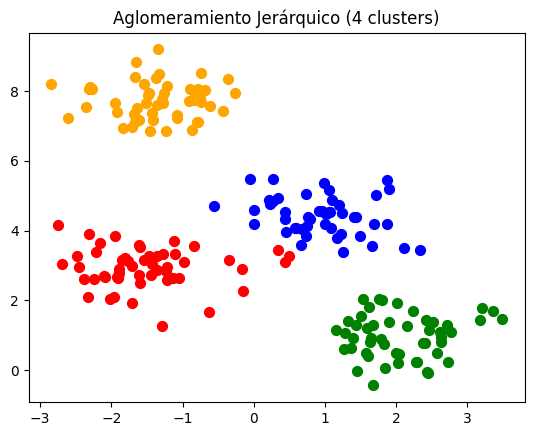

In [6]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red',)
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, c='blue',)
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, c='green',)
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=50, c='orange',)

plt.title("Aglomeramiento Jerárquico (4 clusters)")
plt.show()

### Ejemplo: Aglomeramiento Jerárquico Paso a Paso

Sea el siguiente conjunto de datos, correspondiente a las calificaciones de 10 estudiantes en 5 materias.  
El objetivo es **obtener los grupos (clusters)** por medio del **algoritmo de aglomeramiento jerárquico**.

### Datos iniciales

| Nombre  | Matemáticas | Ciencias | Español | Historia | Deportes |
|----------|--------------|-----------|----------|-----------|-----------|
| Lucía    | 7.0 | 6.5 | 9.2 | 8.6 | 8.0 |
| Pedro    | 7.5 | 9.4 | 7.3 | 7.0 | 7.0 |
| Inés     | 7.6 | 9.2 | 8.0 | 8.0 | 7.5 |
| Luis     | 5.0 | 6.5 | 6.5 | 7.0 | 9.0 |
| Andrés   | 6.0 | 6.0 | 7.8 | 8.9 | 7.3 |
| Ana      | 7.8 | 9.6 | 7.7 | 8.0 | 6.5 |
| Carlos   | 6.3 | 6.4 | 8.2 | 9.0 | 7.2 |
| José     | 7.9 | 9.7 | 7.5 | 8.0 | 6.0 |
| Sonia    | 6.0 | 6.0 | 6.5 | 5.5 | 8.7 |
| María    | 6.8 | 7.2 | 8.7 | 9.0 | 7.0 |

### Paso 1: Calcular las distancias entre los datos

Para cada par de alumnos, calculamos la **distancia euclidiana**:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

Donde  $x_i$ y $y_i$ representan las calificaciones de los alumnos en la materia  $i$.

### Paso 2: Matriz de distancias

|        | Lucía | Pedro | Inés | Luis | Andrés | Ana | Carlos | José | Sonia | María |
|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| **Lucía**  | 0 | 3.98 | 3.11 | 3.85 | 1.94 | 3.89 | 1.51 | 4.28 | 4.32 | **1.39** |
| **Pedro**  |   | 0 | **0.65** | 4.39 | 4.21 | 1.24 | 3.91 | 1.51 | 4.43 | 3.36 |
| **Inés**   |   |   | 0 | 4.42 | 3.70 | 1.13 | 3.26 | 1.69 | 4.77 | 2.53 |
| **Luis**   |   |   |   | 0 | 3.07 | 1.90 | 3.43 | 5.45 | **1.89** | 4.07 |
| **Andrés** |   |   |   |   | 0 | 4.20 | **1.34** | 4.46 | 3.90 | 1.73 |
| **Ana**    |   |   |   |   |   | 0 | 3.77 | **0.56** | 5.36 | 3.00 |
| **Carlos** |   |   |   |   |   |   | 0 | 4.05 | 4.20 | **1.09** |
| **José**   |   |   |   |   |   |   |   | 0 | 5.64 | 3.30 |
| **Sonia**  |   |   |   |   |   |   |   |   | 0 | 4.70 |
| **María**  |   |   |   |   |   |   |   |   |   | 0 |

Los valores **resaltados** indican las distancias más pequeñas, por donde comenzaremos la agrupación.

### Paso 3: Primer agrupamiento (pares más cercanos)

| Clúster | Nombre 1 | Nombre 2 |
|----------|-----------|-----------|
| **C1** | María | Lucía |
| **C2** | Pedro | Inés |
| **C3** | Luis | Sonia |
| **C4** | Andrés | Carlos |
| **C5** | Ana | José |

Cada par se combina en un nuevo clúster. Ahora cada clúster se considera un “nuevo punto”.

### Paso 4: Calcular el valor medio (centroide) de cada clúster

| Clúster | Matemáticas | Ciencias | Español | Historia | Deportes |
|----------|-------------|-----------|----------|-----------|-----------|
| **C1** | 6.9 | 6.85 | 8.95 | 8.8 | 7.50 |
| **C2** | 7.55 | 9.3 | 7.65 | 7.5 | 7.25 |
| **C3** | 5.5 | 6.25 | 6.5 | 6.25 | 8.85 |
| **C4** | 6.15 | 6.2 | 8.0 | 8.95 | 7.25 |
| **C5** | 7.85 | 9.65 | 7.6 | 8.0 | 6.25 |

### Paso 5: Calcular las distancias entre los nuevos clústeres

| Distancias | C1 | C2 | C3 | C4 | C5 |
|-------------|-----------|-----------|-----------|-----------|-----------|
| **C1** | 0 | **1.21037** | 5.30236 | 4.10548 | 3.57164 |
| **C2** |   | 0 | 4.35316 | 3.71416 | 3.14126 |
| **C3** |   |   | 0 | 3.53907 | 4.08014 |
| **C4** |   |   |   | 0 | **1.40446** |
| **C5** |   |   |   |   | 0 |

De la tabla, observamos que las distancias más pequeñas son:
- Entre **C1 y C2** (1.21)
- Entre **C4 y C5** (1.40)

Por lo tanto, estos se agrupan nuevamente.

### Paso 6: Nuevos clústeres tras la segunda fusión

| Clúster | Matemáticas | Ciencias | Español | Historia | Deportes |
|----------|-------------|-----------|----------|-----------|-----------|
| **C1' (C1 + C2)** | 7.7 | 9.475 | 7.625 | 7.75 | 6.75 |
| **C2' (C4 + C5)** | 6.525 | 6.325 | 8.475 | 8.875 | 7.325 |
| **C3** | 5.5 | 6.25 | 6.5 | 6.25 | 8.85 |

### Paso 7: Calcular las distancias finales

| Distancias | C1' | C2' | C3 |
|-------------|-----------|-----------|-----------|
| **C1'** | 0 | **3.5301** | 4.8131 |
| **C2'** |   | 0 | 3.5391 |
| **C3** |   |   | 0 |

El valor más bajo (3.53) se encuentra entre **C1' y C2'**, por lo que estos se fusionan finalmente.

### Paso 8: Nuevos clústeres tras la tercera fusión

| Clúster | Matemáticas | Ciencias | Español | Historia | Deportes |
|----------|-------------|-----------|----------|-----------|-----------|
| **C1'' (C1' + C2')** | 7.2 | 7.875 | 7.925 | 8.55 | 7.05 |
| **C3** | 5.5 | 6.25 | 6.5 | 6.25 | 8.85 |

Estos se fusionan facilmente, asi que ya tenemos el arbol o el endograma

<p align="center">
  <img src="img/dendograma01.png" width="700">
</p>